In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
create_time = pd.read_csv("../results_03_15/CKQST_KNN_NO_search_sub_timeline_100000_100000.csv", names=['obj_search', 'insert', 'ar', 'des_count', 'level']).reset_index()
create_time['name'] = 'ckqst'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] * 4 / 1000000
create_time = create_time.melt(id_vars=['index', 'name', 'ar', 'des_count', 'level'], var_name='stage', value_name='time')
create_time['time'] = create_time['time'].apply(lambda x: 200 if x > 200 else x)
create_time

,index,name,ar,des_count,level,stage,time
0,0,ckqst,2.095607e+01,0,0,obj_search,12.510519
1,1,ckqst,1.797693e+308,0,0,obj_search,6.444926
2,2,ckqst,3.016183e-01,0,0,obj_search,0.285992
3,3,ckqst,3.928520e-01,0,0,obj_search,0.212649
4,4,ckqst,1.797693e+308,0,0,obj_search,0.287037
...,...,...,...,...,...,...,...
199995,99995,ckqst,1.181172e+01,0,0,insert,0.013096
199996,99996,ckqst,1.346793e+00,0,0,insert,0.016276
199997,99997,ckqst,1.017120e+00,0,0,insert,0.021580
199998,99998,ckqst,3.827053e-01,0,0,insert,0.008080


## Creation time

(0.0, 10.0)

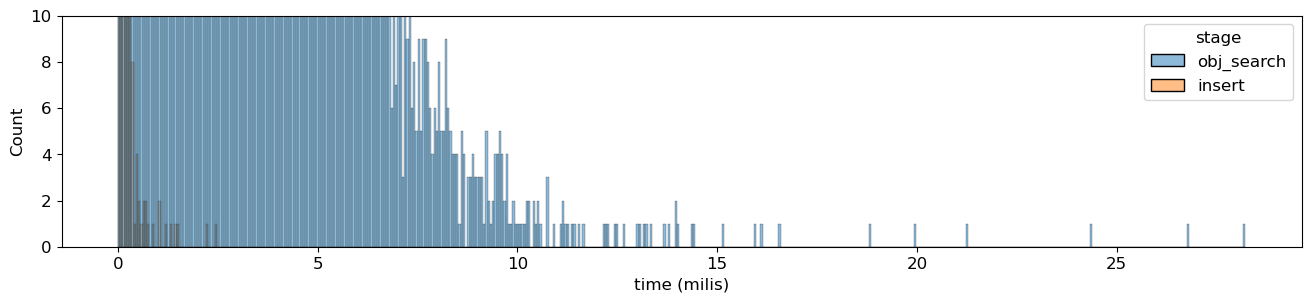

In [4]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [5]:
miserable_queries = create_time[create_time['time'] > 5].sort_values('time', ascending=False)
miserable_queries

,index,name,ar,des_count,level,stage,time
3283,3283,ckqst,1.384628e+02,0,0,obj_search,28.214999
7704,7704,ckqst,1.797693e+308,0,0,obj_search,26.769894
3410,3410,ckqst,1.797693e+308,0,0,obj_search,24.334921
98321,98321,ckqst,1.797693e+308,0,0,obj_search,21.250891
925,925,ckqst,1.797693e+308,0,0,obj_search,19.959396
...,...,...,...,...,...,...,...
35130,35130,ckqst,1.797693e+308,0,0,obj_search,5.017339
11133,11133,ckqst,1.797693e+308,0,0,obj_search,5.015047
71181,71181,ckqst,1.797693e+308,0,0,obj_search,5.012378
55697,55697,ckqst,1.797693e+308,0,0,obj_search,5.006137


(0.0, 25.0)

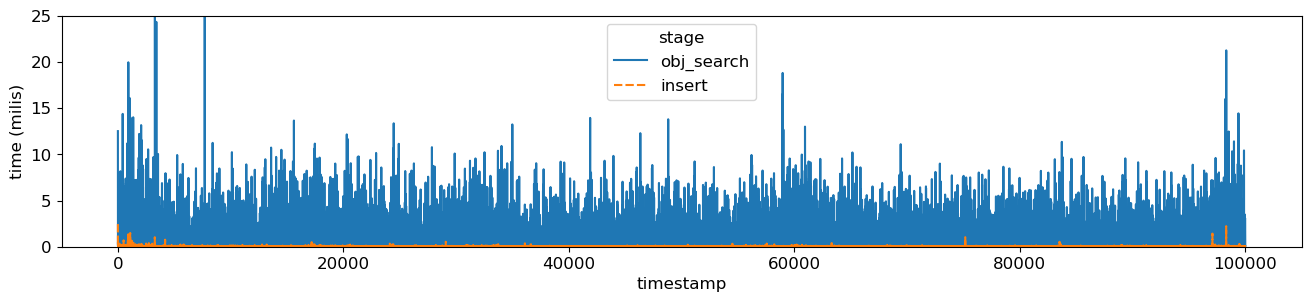

In [13]:
# step = 500000
# for i in range(0, 2500000, step):
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')
plt.ylim(0, 25)

Relative time (FAST vs CkQST)

In [7]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [8]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


### Properties of miserable queries

In [9]:
queries_df.shape

(2500000, 5)

In [10]:
details = queries_df.join(miserable_queries.set_index('index'), on='index').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
details['ar'] = details['ar'].apply(lambda x: np.inf if x > 512 else x)
all = details.drop(columns=['x', 'y']).rename(columns={'time': 'insertion time (milis)'})

In [11]:
obj_search = all[all['stage'] == 'obj_search']
insert = all[all['stage'] == 'insert']

# insert#.join(ckqsts, rsuffix='_')
insert.head(25)

,index,keywords,scaled,name,ar,des_count,level,stage,insertion time (milis)


In [12]:
obj_search.head(25)

,index,keywords,scaled,name,ar,des_count,level,stage,insertion time (milis)
3283,3283,[paint],True,ckqst,138.462821,0.0,0.0,obj_search,28.214999
7704,7704,"[screen, window]",True,ckqst,inf,0.0,0.0,obj_search,26.769894
3410,3410,"[music, dealer]",True,ckqst,inf,0.0,0.0,obj_search,24.334921
98321,98321,[eating],True,ckqst,inf,0.0,0.0,obj_search,21.250891
925,925,"[club, health, studio, gymnasium]",True,ckqst,inf,0.0,0.0,obj_search,19.959396
58971,58971,"[mfg, trimming]",True,ckqst,52.739482,0.0,0.0,obj_search,18.806382
58982,58982,"[water, plant, waste, treatment]",True,ckqst,inf,0.0,0.0,obj_search,16.542640
1043,1043,[audio],True,ckqst,inf,0.0,0.0,obj_search,16.097097
98220,98220,[establishment],True,ckqst,inf,0.0,0.0,obj_search,15.969634
913,913,"[operator, local, trucking]",True,ckqst,inf,0.0,0.0,obj_search,15.140865


### Extract Inf

In [12]:
inf_queries = obj_search[obj_search['ar'] == np.inf]

In [13]:
# inf_queries['index'].to_csv('../../data/exported/places_o200000_q2500000_scaled.inf.csv')